In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cifar_tools

In [2]:
def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

In [3]:
W = tf.Variable(tf.random_normal([5,5,1,32]))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    W_val = sess.run(W)
    show_weights(W_val, 'step0_weights.png')

In [4]:
def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0,:,:,i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

In [5]:
names, data, labels = cifar_tools.read_data('./cifar-10-batches-py')

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


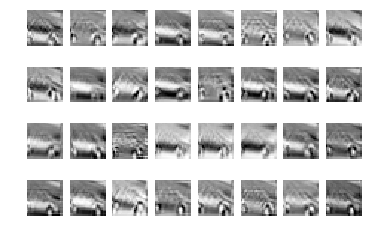

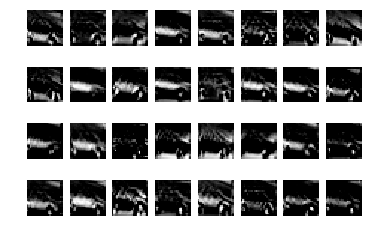

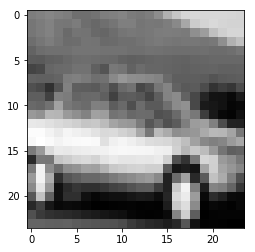

(576,)

In [11]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
plt.show()
np.shape(raw_data)

In [8]:
x = tf.reshape(raw_data, shape=[-1, 24, 24, 1])

b = tf.Variable(tf.random_normal([32]))
conv = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    conv_val = sess.run(conv)
    print('convolution results:')
    show_conv_results(conv_val, 'step1_conv_outs.png')
    print(np.shape(conv_val))
    
    conv_out_val = sess.run(conv_out)
    print('convolution with bias and relu:')
    show_conv_results(conv_out_val, 'step2_conv_outs.png')
    print(np.shape(conv_out_val))

convolution results:
(1, 24, 24, 32)
convolution with bias and relu:
(1, 24, 24, 32)


maxpool after all the convolutions: 
(1, 12, 12, 32)


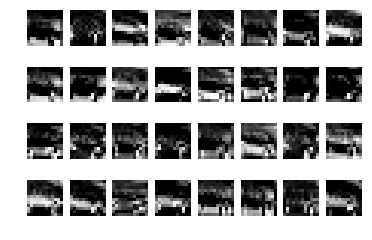

In [12]:
k = 2
maxpool = tf.nn.max_pool(conv_out, ksize=[1,k,k,1], strides=[1,k,k,1], padding='SAME')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    maxpool_val = sess.run(maxpool)
    print('maxpool after all the convolutions: ')
    print(np.shape(maxpool_val))
    show_conv_results(maxpool_val)